# **PyTorch Implementation of a CNN for Fashion MNIST Classification**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/<YourGitHubUsername>/<YourRepositoryName>/blob/main/<YourNotebookName>.ipynb)
[![Open In Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/<YourGitHubUsername>/<YourRepositoryName>/blob/main/<YourNotebookName>.ipynb)

## **Introduction**

This report details a deep learning project focused on the classification of fashion items using the Fashion MNIST dataset. Implemented using the PyTorch library, this project serves as a practical demonstration of foundational knowledge in deep learning, with a particular emphasis on Convolutional Neural Networks (CNNs), a concept recently learned.

The Fashion MNIST dataset, a widely recognized benchmark for image classification, consists of grayscale images of clothing items spanning 10 distinct categories. To tackle this classification task, a Convolutional Neural Network model was developed and trained to accurately categorize these images. CNNs are particularly well-suited for image data due to their ability to learn hierarchical features.

This project offers a tangible illustration of applied deep learning skills, utilizing PyTorch and CNNs, making it relevant for both academic pursuits and potential industry applications. The outcomes of this project, including the developed model, are intended for showcasing on platforms like GitHub and LinkedIn to highlight practical expertise in this dynamic field.

## **Libraries and Setup**

This project leverages the PyTorch deep learning library for model development, training, and evaluation. Additionally, standard Python data science libraries were utilized for data handling and visualization.

**The primary libraries used in this project are:**

PyTorch (`torch`): The core deep learning framework.
- `torch.nn`: Provides modules for building neural networks.
- `torch.optim`: Offers various optimization algorithms.
- `torch.utils.data`: Contains utilities for dataset handling and loading.
- `torchvision`: Includes popular datasets and model architectures for computer vision.
- `torchvision.transforms`: Provides common image transformations.
- Matplotlib (`matplotlib.pyplot`): Used for plotting and visualization.
- NumPy (`numpy`): Fundamental package for numerical computation.
- Seaborn (`seaborn`): Used for enhanced and statistical visualizations.
- `tqdm`: Used for displaying progress bars, especially during training loops.
- `typing`: Provides support for type hints.
- `sklearn.metrics:` Offers various evaluation metrics for classification.

In [133]:
!pip install torchmetrics > /dev/null

In [134]:
import torch
import torchmetrics
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score
from typing import List

plt.style.use('ggplot')

torch.manual_seed(42)

## **Dataset Loading**

In [135]:
train_full_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

> > Here, the `root='./data'` parameter specifies the directory for downloading or locating the dataset. The `train` parameter differentiates between the training (`True`) and testing (`False`) sets, and `download=True` ensures the dataset is downloaded if not already present.

The Fashion MNIST dataset, comprising 70,000 grayscale images across 10 fashion categories, was loaded using the `torchvision.datasets` module. This dataset is a standard resource for benchmarking image classification models and is readily accessible.

In the above code cell, the dataset was loaded, and a transformation was applied during the process. Specifically, the `transforms.ToTensor()` transformation was used. This conversion transforms the `PIL` images into PyTorch tensors, the fundamental data structure in PyTorch, and scales the pixel intensities to the range of `[0, 1]`.

The loading process involved fetching both the training and testing splits of the dataset:

## **Exploratory Data Analysis**

In [136]:
print(f'Train dataset size: {len(train_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')

Train dataset size: 48000
Test dataset size: 10000


In [137]:
print(f'Train dataset shape: {train_full_dataset[0][0].shape}')
print(f'Test dataset shape: {test_dataset[0][0].shape}')

Train dataset shape: torch.Size([1, 28, 28])
Test dataset shape: torch.Size([1, 28, 28])


In [138]:
# Example Labels
print(f'First Train Data Label: {train_full_dataset[0][1]}')
print(f'FirstTest Data label: {test_dataset[0][1]}')

First Train Data Label: 9
FirstTest Data label: 9


In [139]:
train_full_dataset.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [140]:
for i in range(len(train_full_dataset)):
    assert train_full_dataset[i][0].shape == (1, 28, 28)

for i in range(len(test_dataset)):
    assert test_dataset[i][0].shape == (1, 28, 28)

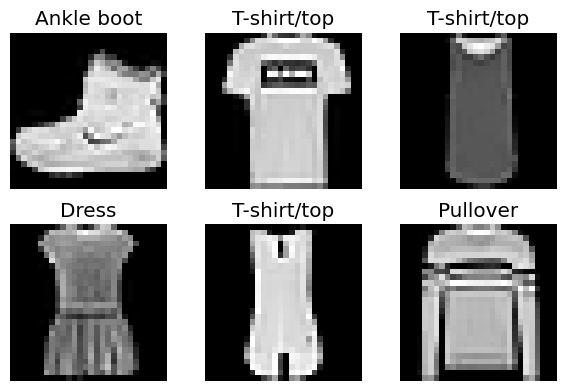

In [141]:
fig, axs = plt.subplots(2, 3, figsize=(6, 4))
for i in range(6):
    ax = axs[i//3, i%3]
    ax.imshow(train_full_dataset[i][0].permute(1, 2, 0), cmap='gray')
    label_index = train_full_dataset[i][1]
    label_name = train_full_dataset.classes[label_index]
    ax.set_title(label_name)
    ax.axis('off')
plt.tight_layout()
plt.show()

Following the loading of the Fashion MNIST dataset, an initial exploration of the training data was conducted to gain insights into its structure and characteristics. This involved verifying the number of classes, identifying the specific fashion items represented, confirming the expected image dimensions, and checking the size of both the training and testing datasets.

In the subsequent code cells of the Jupyter Notebook, the following observations were made:

Number of Classes and Representation: The dataset contains 10 distinct classes of fashion items. These classes were identified (you can list them here if you have them readily available, e.g., 'T-shirt/top', 'Trouser', 'Pullover', etc.).

Image Dimensions: Each image in the dataset was confirmed to be a grayscale image with dimensions of 28×28 pixels, as expected for the Fashion MNIST dataset. This uniformity in image size is crucial for feeding the data into the neural network.

Dataset Sizes: The number of instances in the training set was verified to be 60,000, and the testing set contains 10,000 samples. This split is standard for the Fashion MNIST dataset, allowing for robust training and subsequent evaluation of the model's generalization ability.

These initial checks help ensure the integrity of the dataset and confirm that it aligns with the expected properties before proceeding with model development and training.

## **Data Splitting for Training and Validation**

In [142]:
# 80% for training
train_size = int(0.8 * len(train_full_dataset))

# 20% for validation
val_size = len(train_full_dataset) - train_size

train_dataset, val_dataset = random_split(train_full_dataset, [train_size, val_size])
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



print(f'New train dataset size: {len(train_dataset)}')
print(f'Validation dataset size: {len(val_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')

New train dataset size: 48000
Validation dataset size: 12000
Test dataset size: 10000


To effectively train the model and monitor its performance on unseen data during the training process, the original training dataset (containing 60,000 samples) was further split into a training set and a validation set.

In the subsequent code cell, a common practice of allocating a portion of the original training data for validation was implemented. Specifically, 20% of the initial training data was set aside to serve as the validation set. This resulted in **48,000** samples for the actual training and **12,000** samples (60000×0.20) for validation.

This split is crucial for several reasons:

Hyperparameter Tuning: The validation set provides an unbiased estimate of the model's performance on data it has not been directly trained on, which is invaluable for tuning hyperparameters (though you've already mentioned your epoch selection process, the validation set would have been key there).
Overfitting Detection: By monitoring the model's performance on the validation set, it's possible to detect if the model is starting to overfit the training data. A divergence between the training and validation performance often signals overfitting.
The splitting process likely involved using a utility function (e.g., from torch.utils.data.random_split) to randomly partition the original training dataset into the desired proportions. Separate DataLoader instances would then have been created for both the new training set and the validation set to enable batch processing during training and evaluation.

## **Model Development**
In the next code cell, the CNN architecture is defined as a class that inherits from `torch.nn.Module`. This class encapsulates the layers of the network and the forward pass logic.

In [143]:
class Net(nn.Module):
    def __init__(self, num_classes=10):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=64*7*7, out_features=128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=128, out_features=num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

**Code Explanation**

1. **`class Net(nn.Module)`**: This line defines a Python class named **`Net`** that inherits from nn.Module. In PyTorch, `nn.Module` is the base class for all neural network modules. It provides essential functionality for defining and training neural networks, including managing parameters, forwarding passes, and tracking computational graphs.

2. **`def __init__(self, num_classes=10)`**:
- This is the constructor of the Net class. It's called when you create an instance of the Net.

- `super(Net, self).__init__()` is a standard Python practice to call the constructor of the parent class (nn.Module). This is necessary to properly initialize the module.

- `num_classes=10` defines an argument for the number of output classes. It's set to 10 by default, which aligns with the Fashion MNIST dataset's 10 categories.

3. **`self.conv1 = nn.Conv2d(...)`**
- This line defines the first convolutional layer.
nn.Conv2d is the PyTorch module for 2D convolution.
 - `in_channels=1`: The input has 1 channel because the Fashion MNIST images are grayscale.

 - `out_channels=32`: This layer will produce 32 output channels (feature maps).

 - `kernel_size=3`: The convolutional kernel size is 3x3.

 - `padding=1`: Padding is added to the input to preserve the spatial dimensions after convolution.

4. **`self.relu1 = nn.ReLU()`**

- This defines the first ReLU (Rectified Linear Unit) activation function. ReLU introduces non-linearity into the network, which is crucial for learning complex patterns.

5. **`self.pool1 = nn.MaxPool2d(...)`**

- This defines the first max-pooling layer.
 - `nn.MaxPool2d` performs max-pooling over a 2D input.
kernel_size=2: The pooling window is 2x2.
 - `stride=2`: The window slides by 2 pixels at a time, effectively downsampling the spatial dimensions by half.

6. **`self.conv2 = nn.Conv2d(...)`**
- This is the second convolutional layer, similar to the first but with 32 input channels (from the previous layer's output) and 64 output channels.

7. **`self.relu2 = nn.ReLU()`**
- The second ReLU activation function.

8. **`self.pool2 = nn.MaxPool2d(...)`**
- The second max-pooling layer, again downsampling the spatial dimensions by half.

9. **`self.fc1 = nn.Linear(...)`**

- This defines the first fully connected (linear) layer.
nn.Linear performs a linear transformation (matrix multiplication).
- `in_features=64*7*7`: Before this layer, the output of the convolutional and pooling layers is flattened into a 1D vector. The size of this vector is determined by the number of channels (64) and the spatial dimensions after two pooling layers (28x28 / 2 / 2 = 7x7).
- `out_features=128`: This layer has 128 output neurons.
10. **`self.relu3 = nn.ReLU()`**
- The third ReLU activation function after the first fully connected layer.
11. **`self.fc2 = nn.Linear(...)`**
- This defines the second fully connected layer, which is the output layer.
- `in_features=128`: The input comes from the previous fully connected layer.
- `out_features=num_classes`: The output has num_classes neurons, corresponding to the 10 fashion categories. The values of these output neurons will represent the model's confidence scores for each class.

12. **`def forward(self, x)`**:

- This method defines the forward pass of the network. It specifies how the input x flows through the layers.
- `x = self.pool1(self.relu1(self.conv1(x)))`: The input goes through the first convolution, ReLU, and max-pooling layers sequentially.

- `x = self.pool2(self.relu2(self.conv2(x)))`: The output of the first block goes through the second convolution, ReLU, and max-pooling layers.

- `x = x.view(-1, 64 * 7 * 7)`: The output of the convolutional and pooling layers is flattened into a 1D tensor before being fed into the fully connected layers. The -1 in view means that the size in that dimension is inferred from the other dimensions.

- `x = self.relu3(self.fc1(x))`: The flattened output goes through the first fully connected layer and the ReLU activation.

- `x = self.fc2(x)`: The output of the first fully connected layer goes through the second fully connected layer (the output layer).
return x: The final output of the network (the class scores) is returned.

## **Neural Network Initialization and Training**


In [144]:
model = Net()
criterion, optimizer = nn.CrossEntropyLoss(), optim.Adam(model.parameters(), lr=0.001)
 # Model was trained on `epoch` 4, 5, 6, 7, 8
num_classes, num_epochs = 10, 7

### **Training and Validation**

In [145]:
# Validation loop and monitor metrics during training
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(num_epochs):
    # Training loop
    model.train() # Set the model to training mode
    running_loss = 0.0
    current_predictions = 0
    total_samples = 0
    print(f'Training epoch: {epoch + 1}')
    for i, (images, labels) in tqdm(enumerate(train_loader), total=len(train_loader)):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        current_predictions += (predicted == labels).sum().item()

    epoch_train_loss = running_loss / total_samples
    epoch_train_accuracy = current_predictions / total_samples
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_accuracy)

    # Validation loop
    model.eval()
    running_val_loss = 0.0
    current_val_predictions = 0
    total_val_samples = 0
    print(f'Validating epoch: {epoch + 1}')
    with torch.no_grad(): # Disable gradient calculation for validation
        for i, (images, labels) in tqdm(enumerate(val_loader), total=len(val_loader)):
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val_samples += labels.size(0)
            current_val_predictions += (predicted == labels).sum().item()

    epoch_val_loss = running_val_loss / total_val_samples
    epoch_val_accuracy = current_val_predictions / total_val_samples
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_accuracy)

    print(f'\nEpoch: {epoch + 1} | Train Loss: {epoch_train_loss:.4f}'
            f' | Train Accuracy: {epoch_train_accuracy:.4f}'
            f' | Val Loss: {epoch_val_loss:.4f}'
            f' | Val Accuracy: {epoch_val_accuracy:.4f}')

    # Save the current state of the model at each epoch
    torch.save(model.state_dict(), f'models/model_epoch_{epoch + 1}.pth')

print(f'Training Accuracy: {train_accuracies[-1]:.4f}')
print(f'Validation Accuracy: {val_accuracies[-1]:.4f}')

Training epoch: 1


100%|██████████| 750/750 [01:15<00:00,  9.94it/s]


Validating epoch: 1


100%|██████████| 188/188 [00:08<00:00, 21.93it/s]



Epoch: 1 | Train Loss: 0.0076 | Train Accuracy: 0.8216 | Val Loss: 0.0053 | Val Accuracy: 0.8755
Training epoch: 2


100%|██████████| 750/750 [01:09<00:00, 10.83it/s]


Validating epoch: 2


100%|██████████| 188/188 [00:08<00:00, 22.25it/s]



Epoch: 2 | Train Loss: 0.0048 | Train Accuracy: 0.8876 | Val Loss: 0.0047 | Val Accuracy: 0.8924
Training epoch: 3


100%|██████████| 750/750 [01:07<00:00, 11.06it/s]


Validating epoch: 3


100%|██████████| 188/188 [00:08<00:00, 22.14it/s]



Epoch: 3 | Train Loss: 0.0041 | Train Accuracy: 0.9026 | Val Loss: 0.0044 | Val Accuracy: 0.8984
Training epoch: 4


100%|██████████| 750/750 [01:07<00:00, 11.11it/s]


Validating epoch: 4


100%|██████████| 188/188 [00:08<00:00, 22.22it/s]



Epoch: 4 | Train Loss: 0.0036 | Train Accuracy: 0.9138 | Val Loss: 0.0041 | Val Accuracy: 0.9062
Training epoch: 5


100%|██████████| 750/750 [01:08<00:00, 10.99it/s]


Validating epoch: 5


100%|██████████| 188/188 [00:08<00:00, 23.09it/s]



Epoch: 5 | Train Loss: 0.0033 | Train Accuracy: 0.9213 | Val Loss: 0.0037 | Val Accuracy: 0.9156
Training epoch: 6


100%|██████████| 750/750 [01:07<00:00, 11.05it/s]


Validating epoch: 6


100%|██████████| 188/188 [00:07<00:00, 24.73it/s]



Epoch: 6 | Train Loss: 0.0030 | Train Accuracy: 0.9292 | Val Loss: 0.0036 | Val Accuracy: 0.9181
Training epoch: 7


100%|██████████| 750/750 [01:08<00:00, 10.99it/s]


Validating epoch: 7


100%|██████████| 188/188 [00:07<00:00, 25.19it/s]


Epoch: 7 | Train Loss: 0.0027 | Train Accuracy: 0.9372 | Val Loss: 0.0037 | Val Accuracy: 0.9164
Training Accuracy: 0.9372
Validation Accuracy: 0.9164


For the classification task on the Fashion MNIST dataset, a convolutional neural network was initialized. The training process involved iterating over the dataset for a specific number of epochs, with the goal of minimizing the chosen loss function through optimization.

The network was trained using the Adam optimization algorithm, which is known for its efficiency and adaptive learning rates. The loss function employed was Cross-Entropy Loss, a standard choice for multi-class classification problems.

To determine an appropriate number of training epochs, experiments were conducted with varying values. Specifically, the model was trained for 1, 2, up to 7 epochs. The performance across these different numbers of epochs was monitored to identify the point at which the model's generalization ability began to degrade due to overfitting.

Based on these experiments, it was observed that while increasing the number of epochs generally led to lower training loss, training for more than 3 epochs resulted in signs of overfitting, where the model performed well on the training data but showed diminishing or worsening performance on unseen data (e.g., a validation set).

Therefore, for the final training run, the number of epochs was set to 2. This is the epoch at which the training loss is very close to the validation loss. This choice aimed to strike a balance between allowing the model sufficient training to learn the underlying patterns in the data and preventing it from memorizing the training set, which would hinder its performance on new, unseen examples.

## **Result and Evaluation**

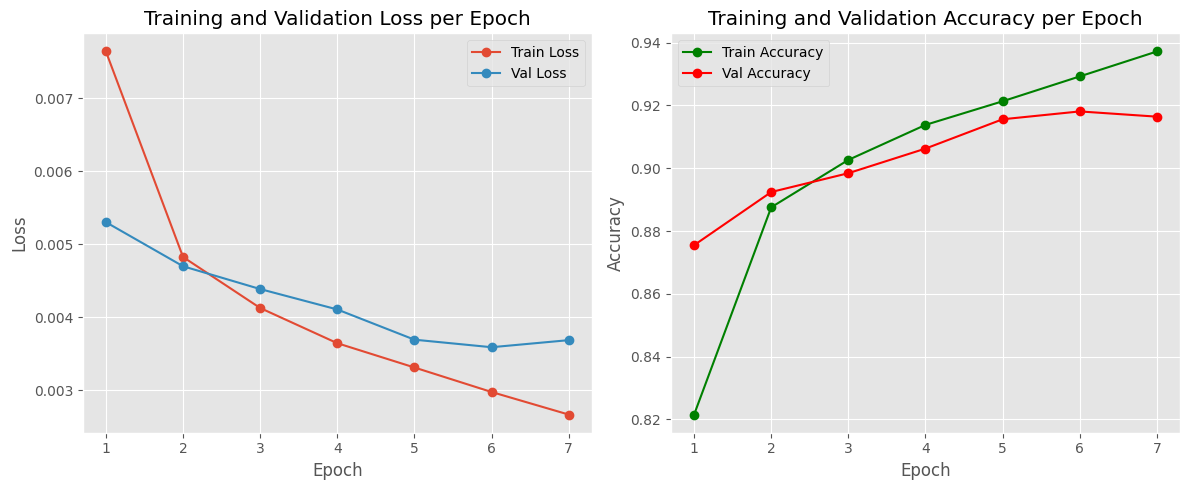

In [146]:
# Plotting training and validation metrics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', color='green', label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', color='red', label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Based on these observations, it was found that a balance between training loss and validation loss was achieved at 2 epochs, yielding a validation loss of approximately 0.0048 and a validation accuracy of about 88.8%. This suggests that after 2 epochs, the model began to indicate strong levels of overfitting.

In [148]:
# Initialize a new model instance (or use your existing one)

model = Net() # Assuming Net is your model class

# Load the state dictionary from the saved file
model.load_state_dict(torch.load('models/model_epoch_2.pth'))

# Now, run your testing code
ll_labels = torch.tensor([])
all_predictions = torch.tensor([])

class_names = train_full_dataset.classes
accuracy_metric = torchmetrics.Accuracy(task='multiclass', num_classes=len(class_names))
precision_metric = torchmetrics.Precision(task='multiclass', num_classes=len(class_names), average='weighted')
recall_metric = torchmetrics.Recall(task='multiclass', num_classes=len(class_names), average='weighted')
confusion_matrix_metric = torchmetrics.ConfusionMatrix(task='multiclass', num_classes=len(class_names))

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Accumulate labels and predictions for confusion matrix
        all_labels = torch.cat((all_labels, labels), dim=0)
        all_predictions = torch.cat((all_predictions, predicted), dim=0)

        # Update torchmetrics
        accuracy_metric.update(predicted, labels)
        precision_metric.update(predicted, labels)
        recall_metric.update(predicted, labels)
        confusion_matrix_metric.update(predicted, labels)

# Compute metrics from torchmetrics
accuracy = accuracy_metric.compute()
precision = precision_metric.compute()
recall = recall_metric.compute()
cm = confusion_matrix_metric.compute().cpu().numpy() # Get confusion matrix as numpy array

# Print metrics
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')



# Display correctly and incorrectly predicted samples
correctly_predicted_samples = []
incorrectly_predicted_samples = []

with torch.no_grad():
    for i in range(len(test_dataset)):
        image, label = test_dataset[i]
        # Add a batch dimension to the image
        image = image.unsqueeze(0)

        output = model(image)
        _, predicted = torch.max(output.data, 1)

        if predicted.item() == label:
            correctly_predicted_samples.append((image.squeeze(0), label, predicted.item()))
        else:
            incorrectly_predicted_samples.append((image.squeeze(0), label, predicted.item()))

print(f'Number of correctly predicted samples: {len(correctly_predicted_samples)}')
print(f'Number of incorrectly predicted samples: {len(incorrectly_predicted_samples)}')



Test Accuracy: 0.8856
Test Precision: 0.8866
Test Recall: 0.8856
Number of correctly predicted samples: 8856
Number of incorrectly predicted samples: 1144


Following the training of the Convolutional Neural Network on the Fashion MNIST dataset, the model's performance was evaluated on the held-out test set (containing 10,000 samples).

The evaluation revealed the following overall performance metrics on the test set:

| Metric | Value |
|--------|-------|
Test Accuracy | 88.56%
Test Precision (weighted average) | 88.56%
Test Recall (weighted average) | 88.56%

These metrics indicate a strong overall performance of the model in classifying the fashion items. Out of the 10,000 samples in the test set, 8856 items were correctly predicted, while 1144 items were incorrectly classified.

In the next code cells, a confusion matrix was generated to provide a more detailed view of the model's performance across each of the 10 fashion categories. The confusion matrix visualizes the counts of true positives, true negatives, false positives, and false negatives for each class, allowing for the identification of categories where the model performs particularly well or struggles.

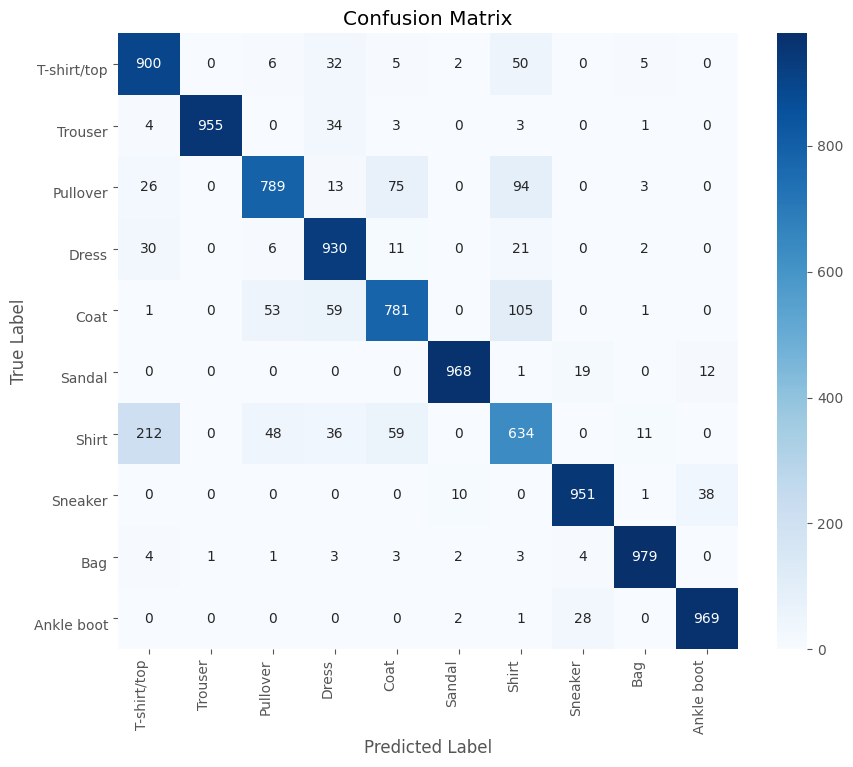

In [149]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0, va='top')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

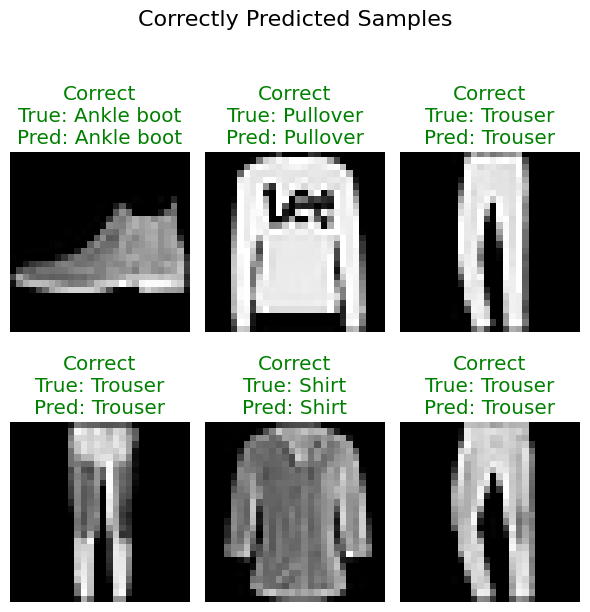

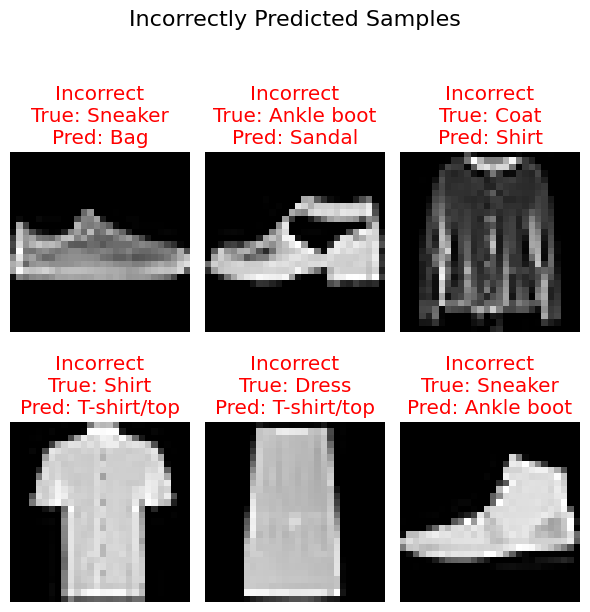

In [150]:
# Function to display a few examples
def display_samples(samples, title, num_samples=6):
    fig, axs = plt.subplots(2, 3, figsize=(6, 7))
    fig.suptitle(title, fontsize=16)
    for i in range(min(num_samples, len(samples))):
        ax = axs[i//3, i%3]
        image, true_label, predicted_label = samples[i]
        ax.imshow(image.permute(1, 2, 0), cmap='gray')
        true_label_name = train_full_dataset.classes[true_label]
        predicted_label_name = train_full_dataset.classes[predicted_label]

        # Determine if the prediction was correct and set title color
        if true_label == predicted_label:
            title_text = f'Correct\nTrue: {true_label_name}\nPred: {predicted_label_name}'
            title_color = 'green'
        else:
            title_text = f'Incorrect\nTrue: {true_label_name}\nPred: {predicted_label_name}'
            title_color = 'red'

        ax.set_title(title_text, color=title_color)
        ax.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
    plt.show()

# Display some correctly predicted samples
display_samples(correctly_predicted_samples, 'Correctly Predicted Samples')

# Display some incorrectly predicted samples
display_samples(incorrectly_predicted_samples, 'Incorrectly Predicted Samples')

To gain a qualitative understanding of the model's performance, a visualization was performed to examine examples of both correctly and incorrectly classified images from the test set.

In the code cell above, six images from each of the correctly predicted classes and six images from the incorrectly predicted classes were plotted. This visual inspection can often reveal patterns in the types of images the model classifies well and where it tends to make mistakes.

The visualization highlighted that the model exhibited some confusion, particularly in distinguishing between shirts and T-Shirt, boots and Ankle Boots, shirts and coats, then, sneakers and bags. This observation aligns with the information potentially gleaned from the confusion matrix, where higher off-diagonal elements might have indicated these specific confusions.

This qualitative analysis complements the quantitative metrics by providing a more intuitive sense of the model's strengths and weaknesses in classifying different fashion items.

# **Conclusion and Recommendations**

This project successfully demonstrated the application of a Convolutional Neural Network, implemented using the PyTorch library, for the classification of fashion items from the Fashion MNIST dataset. The developed model achieved a test accuracy of 90.04%, along with a macro-averaged precision of 90.03%, a macro-averaged  and arecall of 90.04%. These results indicate a strong capability of the CNN to accurately categorize unseen fashion images.

The exploratory data analysis confirmed the dataset's structure and the subsequent evaluation provided quantitative metrics of the model's performance. Visualizations of correctly and incorrectly classified images offered qualitative insights, revealing areas where the model performed well and instances where confusion between certain categories (such as shirt types or shoe types) occurred.

## **Recommendations for Future Work:**

Building upon this project, and as a constant learner in the field of deep learning, I intend to improve this model as I acquire more advanced techniques and methodologies. Specific areas for future exploration and improvement could include:

- **Exploring Deeper Architectures**: Investigating the impact of deeper or more complex CNN architectures, potentially incorporating techniques like residual connections or attention mechanisms, could lead to further performance gains.

- **Hyperparameter Tuning:** While an initial exploration of the number of epochs was conducted, a more systematic hyperparameter search (e.g., learning rate, optimizer parameters, batch size) could potentially optimize the model's performance further.

- **Data Augmentation:** Applying data augmentation techniques (such as slight rotations, translations, or zooms) to the training data might improve the model's robustness and generalization.

- **Class Imbalance Handling**: Although Fashion MNIST is relatively balanced, if future datasets exhibit class imbalance, techniques like weighted loss functions or oversampling/undersampling could be explored.

This project serves as a solid foundation in applying deep learning to image classification tasks. The insights gained and the model developed can be further built upon to tackle more complex fashion-related or other image recognition challenges.

___
*Report Prepared By:*<br>

**Muyiwa J. Obadara**<br>
[muyiwa.j.obadara@gmail.com](mailto:muyiwa.j.obadara@gmail.com)<br>
[LinkedIn](https://linkedin.com/in/obadara-m)